In [45]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [46]:
# Descargar los datos
activo = 'NQ=F'
df = yf.Ticker(activo)
df = df.history( start='2020-01-01', end='2024-01-01')

In [47]:
# Convertir el indice a columna
df.reset_index(inplace=True)

In [48]:
# Guardar las fechas en una columna separada
dates = df['Date']

In [49]:
# Seleccionar la columna de precios de cierre y numerar el indice de 0 a x
close_prices = df['Close']
close_prices.index = range(len(close_prices))

In [50]:
# Ajustar el modelo ARIMA
model = ARIMA(close_prices, order=(5, 1, 2))
model_fit = model.fit()

/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -6748.534
Date:                Tue, 03 Dec 2024   AIC                          13513.067
Time:                        10:35:12   BIC                          13552.377
Sample:                             0   HQIC                         13528.003
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2139      0.562     -0.381      0.703      -1.315       0.887
ar.L2          0.6043      0.547      1.104      0.270      -0.468       1.677
ar.L3          0.0197      0.045      0.435      0.664      -0.069       0.108
ar.L4         -0.0456      0.029     -1.555      0.120      -0.103       0.012
ar.L5          0.0721      0.038      1.890      0.059      -0.003       0.147
ma.L1          0.1514      0.559      0.271      0.787      -0.945       1.248
ma.L2         -0.6150      0.514     -1.197      0.231      -1.622       0.392
sigma2      3.991e+04   1522.805     26.209      0.000    3.69e+04    4.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                62.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.37
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# Obtener predicciones dentro de la muestra
in_sample_preds = model_fit.predict(start=0, end=len(close_prices)-1)


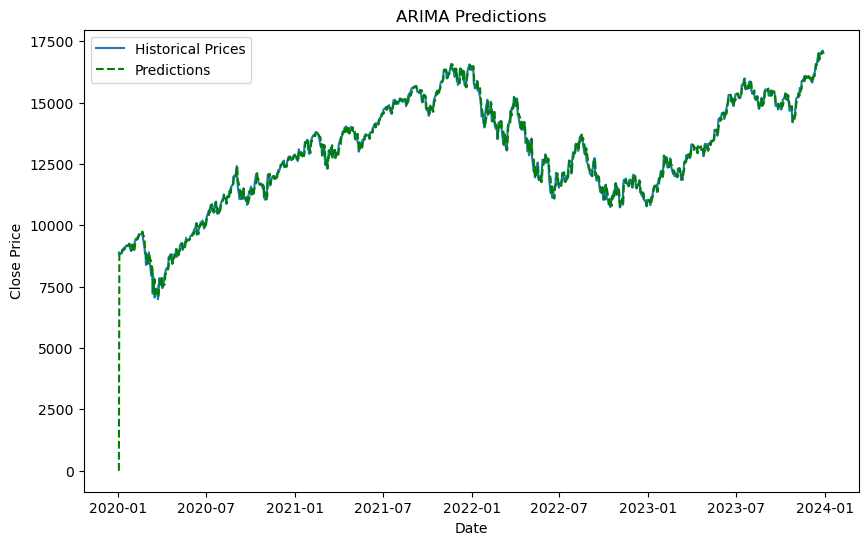

In [53]:
# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar los precios reales y las predicciones dentro de la muestra
plt.plot(dates, close_prices, label='Historical Prices')
plt.plot(dates, in_sample_preds, label='Predictions', linestyle='--', color='green')

plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
plt.show()

[*********************100%***********************]  1 of 1 completed
/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70096D+00    |proj g|=  7.34065D-02

At iterate    5    f=  3.58115D+00    |proj g|=  3.87333D-02

At iterate   10    f=  3.57988D+00    |proj g|=  1.22203D-02

At iterate   15    f=  3.57820D+00    |proj g|=  1.75835D-03

At iterate   20    f=  3.57802D+00    |proj g|=  1.72607D-04

At iterate   25    f=  3.57799D+00    |proj g|=  3.76659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   

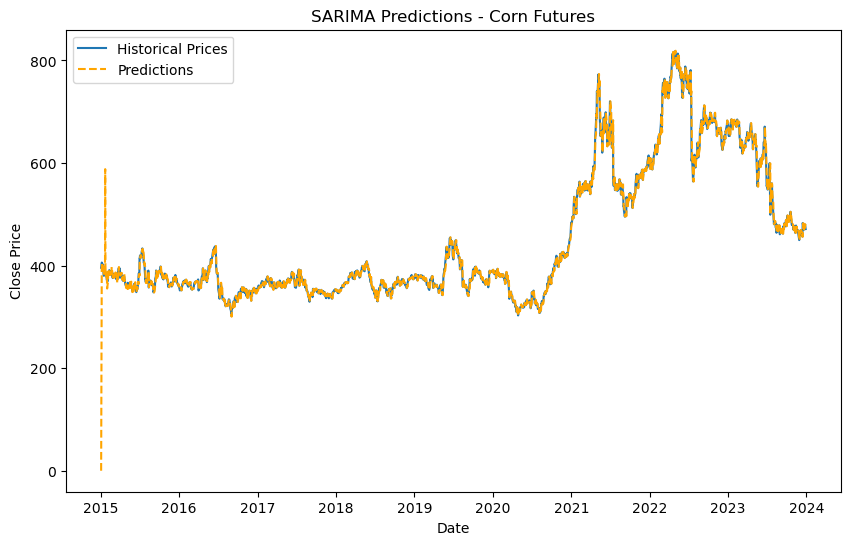

In [54]:
# SARIMA 
import yfinance as yf
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Descargar los datos del maíz
df = yf.download('ZC=F', start='2015-01-01', end='2024-01-01')

# Convertir el índice a columna
df.reset_index(inplace=True)

# Guardar las fechas y el precio de cierre
dates = df['Date']
close_prices = df['Close']

# Numerar el índice de 0 a x
close_prices.index = range(len(close_prices))

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(close_prices, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

# Mostrar el resumen del modelo
print(sarima_fit.summary())

# Obtener predicciones dentro de la muestra
in_sample_preds = sarima_fit.predict(start=0, end=len(close_prices)-1)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Historical Prices')
plt.plot(dates, in_sample_preds, label='Predictions', linestyle='--', color='orange')
plt.title('SARIMA Predictions - Corn Futures')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()